# Rarefaction analysis

This notebook visualizes the rarefaction results generated from `scripts/rarefaction_curve.py`. Classifiers all capture remarkably different levels of diversity.

***

In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [11]:
base = Path("raw_data") / "rarefaction"

classifiers = ["cf_nt", "cf_gtdb", "cf_rs", "k2_nr", "k2_rs", "br_rs", "dmd_ur", "dmd_nr", "smr", "agg"]
suffixes = ["sd", "r", "si"]

files = {
    c: {s: base / f"{c}_rf_{s}.tsv" for s in suffixes}
    for c in classifiers
}

In [14]:
sd_paths = [files[c]["sd"] for c in classifiers]
r_paths  = [files[c]["r"]  for c in classifiers]
si_paths = [files[c]["si"] for c in classifiers]

labels = {
    "sd": "Shannon Diversity",
    "r": "Richness",
    "si": "Simpson Index",
}

In [15]:
dfs = {s: [] for s in suffixes}
for c in classifiers:
    for s in suffixes:
        f = files[c][s]
        df = pd.read_csv(f, sep="\t", header=0)
        value = f.stem.rsplit("_", 2)[0]  # classifier name part
        dfs[s].append((df, f"{labels[s]},{value}"))

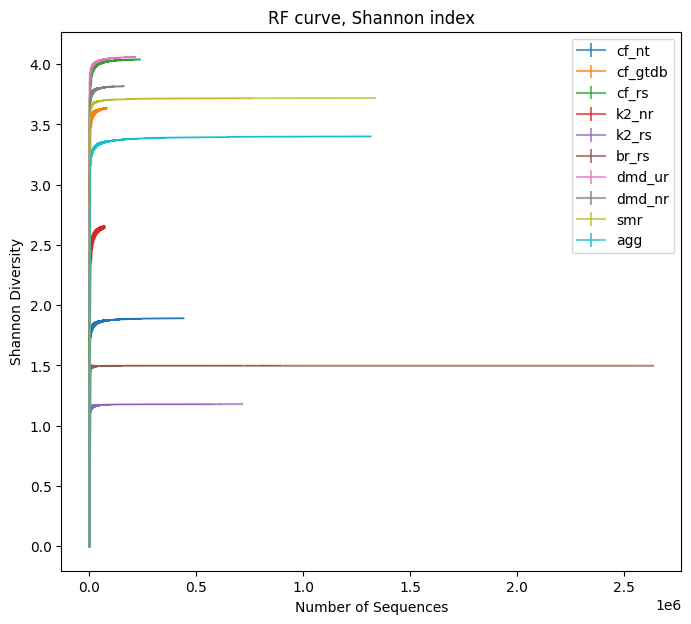

In [ ]:
plt.figure(figsize=(8, 7))
for df, att in dfs["sd"]:
    plt.errorbar(df['depth'], df['mean_diversity'], yerr=df['std_dev'], label=att.split(',')[1], alpha = 0.7)
plt.title('RF curve, Shannon index')
plt.xlabel('Number of Sequences')
plt.ylabel('Shannon Diversity')
plt.legend()
plt.savefig(r'figures\rarefaction\shannon.png')
plt.show()

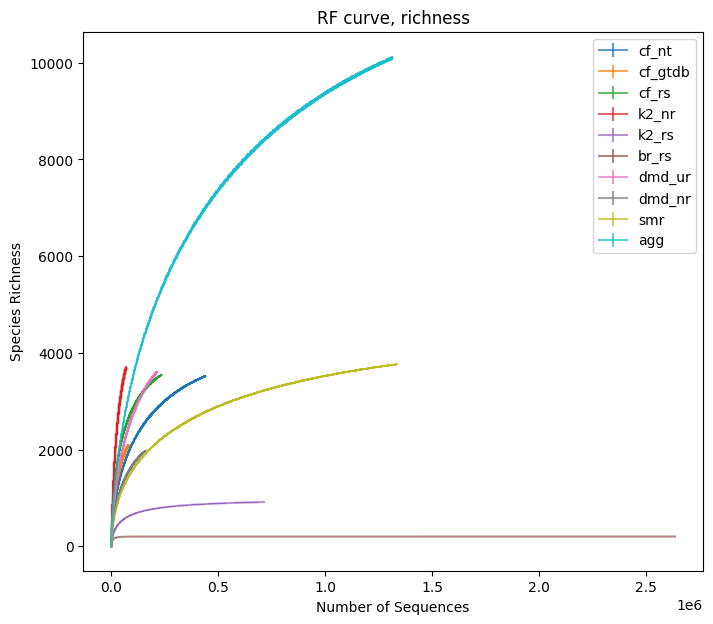

In [ ]:
plt.figure(figsize=(8, 7))
for df, att in dfs["r"]:
    plt.errorbar(df['depth'], df['mean_diversity'], yerr=df['std_dev'], label=att.split(',')[1], alpha = 0.7)
plt.title('RF curve, richness')
plt.xlabel('Number of Sequences')
plt.ylabel('Species Richness')
plt.legend()
plt.savefig(r'figures\rarefaction\richness.png')
plt.show()

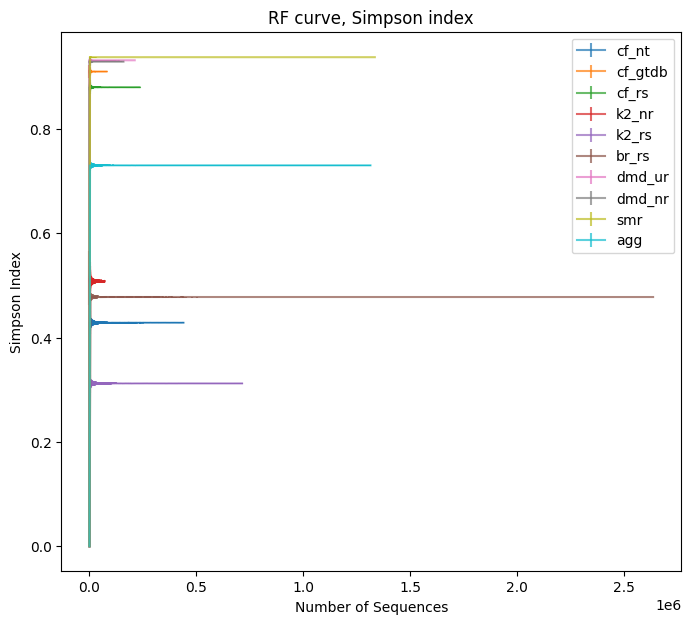

In [ ]:
plt.figure(figsize=(8, 7))
for df, att in dfs["si"]:
    plt.errorbar(df['depth'], df['mean_diversity'], yerr=df['std_dev'], label=att.split(',')[1], alpha = 0.7)
plt.title('RF curve, Simpson index')
plt.xlabel('Number of Sequences')
plt.ylabel('Simpson Index')
plt.legend()
plt.savefig(r'figures\rarefaction\simpson.png')
plt.show()

In [18]:
for df, att in dfs["sd"] + dfs["r"] + dfs["si"]:
    ind, db = tuple(att.split(","))
    plt.figure(figsize = (8, 7))
    plt.errorbar(df['depth'], df['mean_diversity'], yerr=df['std_dev'], color='blue', ecolor='red')
    max_tick = max(df['depth']) + (50000 - (max(df['depth']) % 50000))
    plt.xticks([tick for tick in range(0, max_tick, int(5e4))])
    plt.title(f'Rarefaction Curve, {db}')
    plt.xlabel('Depth')
    plt.ylabel(f'{ind}')
    if ind == 'Shannon Diversity':
        plt.savefig(rf'figures\rarefaction\individual\shannon\{db}_sh.png')
    elif ind == 'Richness':
        plt.savefig(rf'figures\rarefaction\individual\richness\{db}_r.png')
    elif ind == 'Simpson Index':
        plt.savefig(rf'figures\rarefaction\individual\simpson\{db}_si.png')
    plt.close()